# THỰC HÀNH CLUSTERING

#### Hoàng Ngọc Thạch - MSSV: 14520811

#### Bài thực hành clustering. 

## Bài tập 2: Hand-writen digits

In [1]:
# Import library
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import pandas as pd

In [2]:
# Load dataset
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


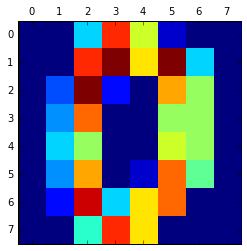

In [3]:
# Import matplotlib to show data
import matplotlib.pyplot as plt
%matplotlib inline
#plt.gray()
plt.matshow(digits.images[0])

#### Training using digits.data (feature of image)

In [4]:
# Apply KMeans clustering to data
number_clusters = 10

#create KMeans model
model = KMeans(n_clusters=number_clusters)

# fit model to data and predict on this data
labels = model.fit_predict(digits.data)


In [5]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': labels, 'Truth_labels': digits.target})

In [6]:
# Create a cross-tablutation
ct = pd.crosstab(df['labels'], df['Truth_labels'])

print(ct)

Truth_labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   2    0    0    0    1  177    0    2    0
1               0  24  148    1    0    0    0    0    3    0
2               1   0    0    0  164    2    0    0    0    0
3               0   1   13  156    0    1    0    0    2    6
4               0  99    8    7    2    0    2    2  100    1
5               0   1    0    2    0  136    0    1    4    6
6             177   0    1    0    0    0    1    0    0    0
7               0  55    2    0    5    0    1    2    6   20
8               0   0    2   10    0   42    0    0   52  139
9               0   0    3    7   10    0    0  174    5    8


### Clustering Center

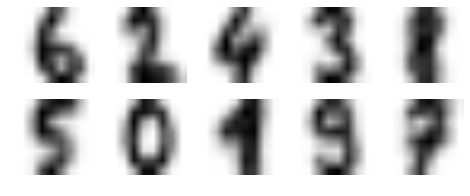

In [7]:
# create a fig to show image
fig = plt.figure(figsize=(8,3))

# for all 0-9 labels
for i in range(10):
    # initialize subplots in a grid 2x5 at i+1th position
    ax = fig.add_subplot(2, 5, 1+i)
    
    # display image
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
    
    #don't show the axes
    plt.axis('off')

plt.show()

### Visualization cluster by t-SNE

In [8]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(learning_rate=100)

new_features = TSNE_model.fit_transform(digits.data)




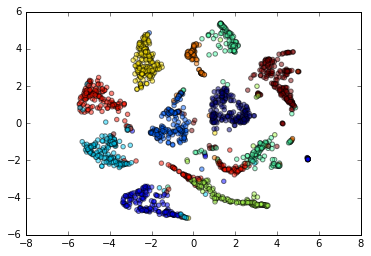

In [9]:
xs = new_features[:,0]
ys = new_features[:,1]

plt.scatter(xs,ys,c=labels, alpha=0.5)
plt.show()

### Visualization Cluster by PCA

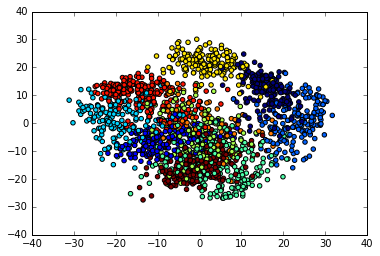

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(digits.data)


plt.scatter(pca[:,0], pca[:,1], c=labels)

plt.show()

## Scale digits data to get better result

In [17]:
from sklearn.preprocessing import scale

data = scale(digits.data)

labels_scale = model.fit_predict(data)

In [109]:
print(digits.images[1])

[[  0.   0.   0.  12.  13.   5.   0.   0.]
 [  0.   0.   0.  11.  16.   9.   0.   0.]
 [  0.   0.   3.  15.  16.   6.   0.   0.]
 [  0.   7.  15.  16.  16.   2.   0.   0.]
 [  0.   0.   1.  16.  16.   3.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   0.  11.  16.  10.   0.   0.]]


In [18]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': lables_scale, 'Truth_labels': digits.target})

# Create a cross-tablutation
ct = pd.crosstab(df['labels'], df['Truth_labels'])

print(ct)

Truth_labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0             177   0    1    0    0    0    1    0    1    0
1               0   0    6  160    0   40    0    0   46  144
2               0  96   24    7    2    2    5    1  104    2
3               0   0    1    7    4    0    0  156    2    8
4               1   0    0    0  158    2    0    0    0    0
5               0  27  141    1    0    0    0    0    0    0
6               0   1    0    8    2  135    0    1    8    4
7               0  58    4    0    7    0    1    3   11   19
8               0   0    0    0    0    3  174    0    2    0
9               0   0    0    0    8    0    0   18    0    3
